Particle swarms
============

This problem set draws on the **04_Swarms** user guide.

In Underworld a swarm is a set of unique particles which store locations along with any other variable the user cares to add. The particles are advected about the simulation domain in response to the velocity field solution of a Stokes system (see the **Systems** user guide).

Underworld uses swarms of particles to carry material information such as viscosity and density as the material moves around the simulation domain. This allows users to track material properties of a slab as it subducts, for example. 

In this notebook we will examine how to create, setup and use particle swarms. While finite element variables are defined and updated on the mesh, particle swarms are free to advect anywhere inside the domain. This makes them useful for a variety of tasks as follows.

**This notebook is broken down into the following examples:**
1. creating simple global swarms with different layouts
2. adding particles to a swarm based on a coordinate list
3. directly editing swarms
4. adding swarm particle variables
5. creating shapes using swarms

**Problems cover**
1. creating particle swarms
2. manipulating swarm particle coordinates
3. building more complex shapes in 2D and 3D

**Keywords:** swarms, particles, shapes


In [1]:
import underworld as uw
import glucifer

Setting up a global swarm
----------

Set up a random distribution of particles over a given mesh. The density of particles per cell controls the total number of particles.

**Create a mesh**

In [2]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (4, 4), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.))

**Initialise a swarm**

Initialise a swarm on a given mesh object.

In [3]:
swarm = uw.swarm.Swarm( mesh=mesh )

**Create a layout object**

Create a layout object that will populate the swarm across the whole domain of the mesh. To populate the mesh the density of particles is required, e.g. the number of particles per cell.

The ``GlobalSpaceFillerLayout`` layout (default) fills the domain with particles in a quasi-random pattern. It utilises Sobol sequences to generate global particle locations which are more uniformly distributed than that achieved by a purely random generator.

In [4]:
swarmLayout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=20 )

Problems:
------

**Problem 1:** The are four different swarm layout types. Examine each in turn using the underworld help command and the visualisation cell below.

Note: the auto complete (``Tab``) button is useful for finding what objects/classes exist in a python object.

In [5]:
uw.help(uw.swarm.layouts.GlobalSpaceFillerLayout)

Object docstring:


    This layout fills the domain with particles in a quasi-random pattern. It utilises
    sobol sequences to generate global particle locations which are more uniform than that
    achieved by a purely random generator. This layout is mostly useful where populating 
    particles across a rectangular domain.

    Parameters
    ----------
    swarm : uw.swarm.Swarm
        The swarm this layout will act upon
    particlesPerCell : float
        The average number of particles per element that this layout will generate.
    
    >>> import underworld as uw
    >>> mesh = uw.mesh.FeMesh_Cartesian('Q1/dQ0', (1,1), (0.,0.), (1.,1.))
    >>> swarm = uw.swarm.Swarm(mesh)
    >>> layout = uw.swarm.layouts.GlobalSpaceFillerLayout(swarm,particlesPerCell=4)
    >>> uw.libUnderworld.StgDomain._ZeroSobolGeneratorGeneratorCount()  # this step isn't necessary, but we include it to ensure deterministic results for this doctest
    >>> swarm.populate_using_layout(layout)
    >>> s

**Active the layout**

In [6]:
swarm.populate_using_layout( layout=swarmLayout )

**Plot resulting swarm**


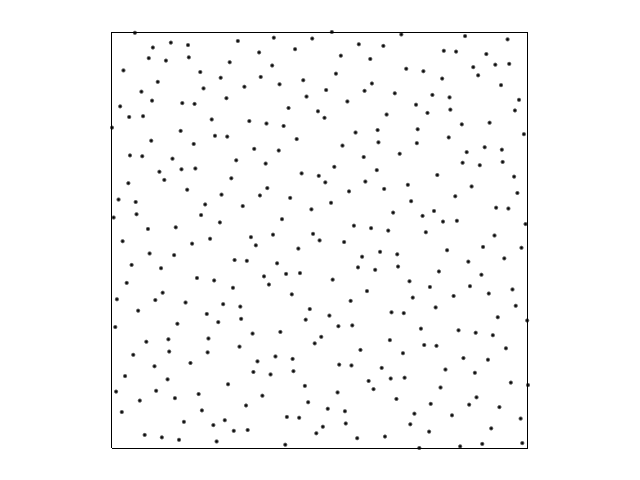

In [7]:
fig1 = glucifer.Figure()
fig1.append( glucifer.objects.Points(swarm=swarm, pointSize=5, colourBar=False) )
fig1.show()

Creating a swarm from a coordinate list
---------

We can use the swarm particle method, with the above plotting method, to visualise the mesh nodes. 
As an example, let us create two swarms and arbitrarily set the particle coordinates to coincide with the nodes on the mesh and sub mesh.

First, lets look at what the data for the first 5 points looks like for the mesh.

In [8]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (4, 4), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.))
print(mesh.data[0:5])

[[ 0.    0.  ]
 [ 0.25  0.  ]
 [ 0.5   0.  ]
 [ 0.75  0.  ]
 [ 1.    0.  ]]


Since these 5 entries are the x, y (in 2D) coordinates for each mesh point, then they can be used directly to set the positions for the swarm particles

In [9]:
# setup a new swarm. At this point there is no data in the swarm
swarmMesh = uw.swarm.Swarm( mesh=mesh )
# setup an array containing the position data from the mesh data
swarmCoords = mesh.data
# use this array to add particles to the newly created swarm
swarmMesh.add_particles_with_coordinates( swarmCoords )

# setup a new swarm
swarmSubMesh = uw.swarm.Swarm( mesh=mesh ) # note this must be the whole mesh
# setup an array containing the position data from the sub mesh data
swarmCoords = mesh.subMesh.data
# use this array to add particles to the newly created swarm
swarmSubMesh.add_particles_with_coordinates( swarmCoords )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32)

The final output from this will be a linear array with the same number of entries as there are nodes in the dQ0 sub mesh (shown above).

**Plot meshes**

Now we can plot these two swarms to see the Q1 linear mesh (4 nodes per element) and the dQ0 sub mesh (single node inside each element).


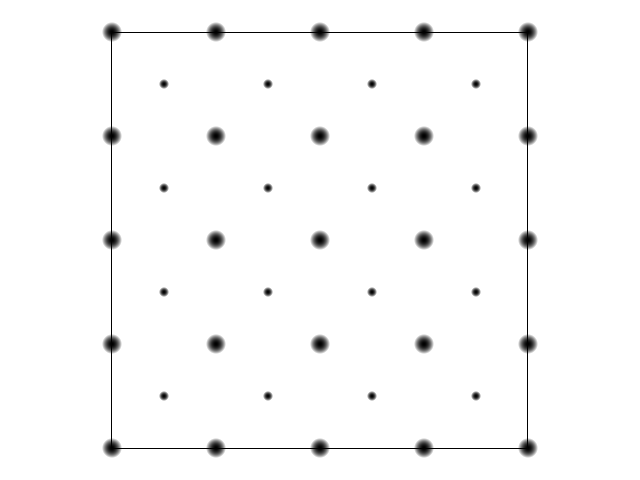

In [10]:
fig2 = glucifer.Figure()
fig2.append( glucifer.objects.Points(swarm=swarmMesh,    pointSize=20, colourBar = False) )
fig2.append( glucifer.objects.Points(swarm=swarmSubMesh, pointSize=10, colourBar = False) )
fig2.show()

Modifying particle positions
-----

Individual particle coordinate data can be accessed in the following way

In [11]:
print('Head of swarm positions')
print(swarm.particleCoordinates.data[0:5])
print('Tail of swarm positions')
print(swarm.particleCoordinates.data[-5:])
iMid = len(swarm.particleCoordinates.data)/2
print('Mid-way particle = {0:4d}'.format(iMid))
xCoord = swarm.particleCoordinates.data[iMid][0]
yCoord = swarm.particleCoordinates.data[iMid][1]
print('x = {0:.2f}; y = {1:.2f}'.format(xCoord,yCoord))

Head of swarm positions
[[ 0.5    0.5  ]
 [ 0.25   0.75 ]
 [ 0.75   0.25 ]
 [ 0.375  0.625]
 [ 0.875  0.125]]
Tail of swarm positions
[[ 0.45117188  0.07617188]
 [ 0.95117188  0.57617188]
 [ 0.20117188  0.82617188]
 [ 0.70117188  0.32617188]
 [ 0.09960938  0.83398438]]
Mid-way particle =  160
x = 0.57; y = 0.83


Problems:
-----

**Problem 2:** Alter the coordinate positions of a few particles and re-plot to see what the effect is.


Making shapes
-----

In this example we will make a few different shapes using a single particle swarm and adding a new variable to denote each shape. 

Create a new mesh with a swarm on it.

In [12]:
res = 64
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (res, res), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.) )

# initialise a swarm. Note this must be the whole mesh.
swarm = uw.swarm.Swarm( mesh=mesh )
# add a data variable which will store an index to determine material
swarmIndex = swarm.add_variable( dataType="int", count=1 )
# create a layout object that will populate the swarm across the whole domain
swarmLayout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=20 )
# activate the layout object
swarm.populate_using_layout( layout=swarmLayout )

**Define a shape: circle**

We want to have a definition of a circle based on the position of each swarm particle. 

Here we use loops to go through each particle in the swarm manually and allocate an index depending on the particle's spatial coordinates. There is an easier (and faster) way to create shapes using functions and conditional statements, for details see the **Functions** user guide.

Firstly, specify parameters for the circle

In [13]:
circleRadius = 0.1
circleCentre = (0.5, 0.5)

Use the location of each particle to set the index depending on whether the position is inside the circle or not.

In [14]:
print('Total number of particles = {0}'.format(len(swarm.particleCoordinates.data)))

Total number of particles = 81920


In [15]:
for pID in range(len(swarm.particleCoordinates.data)):
    x = swarm.particleCoordinates.data[pID][0]
    z = swarm.particleCoordinates.data[pID][1]
    xx = x - circleCentre[0]
    zz = z - circleCentre[1]
    condition = (xx*xx + zz*zz < circleRadius**2)
    if(condition == True):  # inside the circle
        swarmIndex.data[pID] = 1
    else:
        swarmIndex.data[pID] = 0

Plot the modified swarm based on the index number


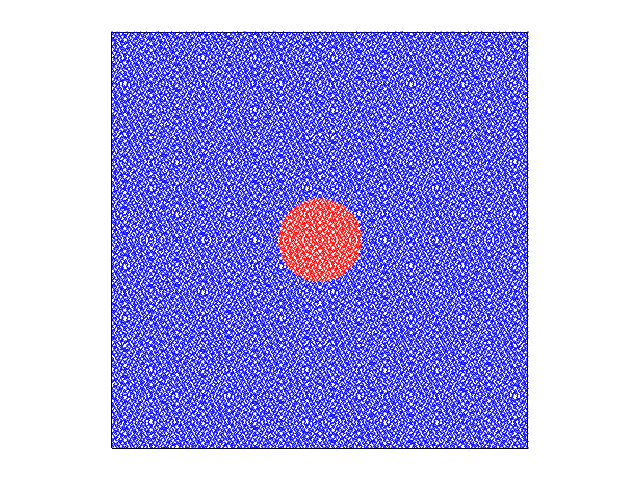

In [16]:
fig3 = glucifer.Figure()
fig3.append( glucifer.objects.Points( swarm=swarm, fn_colour=swarmIndex, colours='blue red', 
                               colourBar = False, pointSize=2.0 ) )
fig3.show()

Problems:
-----

**Problem 3:** Makes some other shapes using this approach.

**Problem 4:** Try making some shapes in 3D
